Você pode adquirir versões impressas e de e-book do *Think Python 3e* (em inglês) em
[Bookshop.org](https://bookshop.org/a/98697/9781098155438) e
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325).

Uma versão em língua portuguesa da 3ª edição foi publicada pela editora [Novatec](https://novatec.com.br/livros/pense-em-python-3ed/).

In [ ]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');
download('https://github.com/ramalho/jupyturtle/releases/download/2024-03/jupyturtle.py');

In [ ]:
import thinkpython

%load_ext autoreload
%autoreload 2

# Funções e Interfaces

Este capítulo apresenta um módulo chamado `jupyturtle`, que permite que você crie desenhos simples dando instruções a uma tartaruga imaginária.
Usaremos este módulo para escrever funções que desenham quadrados, polígonos e círculos -- e para demonstrar **projeto de interface**, que é uma maneira de projetar funções que funcionam juntas.

## O módulo jupyturtle

Para usar o módulo `jupyturtle`, podemos importá-lo assim:

In [ ]:
import jupyturtle

Agora podemos usar as funções definidas no módulo, como `make_turtle` e `forward`:

In [ ]:
jupyturtle.make_turtle()
jupyturtle.forward(100)

`make_turtle` cria uma **tela**, que é um espaço na tela do computador onde podemos desenhar, e uma tartaruga, que é representada por um casco circular e uma cabeça triangular.
O círculo mostra a localização da tartaruga e o triângulo indica a direção para a qual ela está voltada.

`forward` move a tartaruga uma determinada distância na direção para a qual ela está voltada, desenhando um segmento de linha ao longo do caminho.
A distância está em unidades arbitrárias -- o tamanho real depende da tela do seu computador.

Usaremos funções definidas no módulo `jupyturtle` muitas vezes, então seria bom se não tivéssemos que escrever o nome do módulo toda vez.
Isso é possível se importarmos o módulo assim:

In [ ]:
from jupyturtle import make_turtle, forward

Esta versão da instrução import importa `make_turtle` e `forward` do módulo `jupyturtle` para que possamos chamá-las assim:

In [ ]:
make_turtle()
forward(100)

`jupyturtle` fornece duas outras funções que usaremos, chamadas `left` e `right`.
Iremos importá-las assim:

In [ ]:
from jupyturtle import left, right

`left` faz com que a tartaruga vire à esquerda. Ela recebe um argumento, que é o ângulo da curva em graus.
Por exemplo, podemos fazer uma curva de 90 graus à esquerda assim:

In [ ]:
make_turtle()
forward(50)
left(90)
forward(50)

Este programa move a tartaruga para o leste e depois para o norte, deixando dois segmentos de linha para trás.
Antes de continuar, veja se você conseguee modificar o programa anterior para fazer um quadrado.

## Fazendo um quadrado

Aqui está uma maneira de fazer um quadrado:

In [ ]:
make_turtle()

forward(50)
left(90)

forward(50)
left(90)

forward(50)
left(90)

forward(50)
left(90)

Como este programa repete o mesmo par de linhas quatro vezes, podemos fazer a mesma coisa de forma mais concisa com um laço `for`.

In [ ]:
make_turtle()
for i in range(4):
    forward(50)
    left(90)

## Encapsulamento e generalização

Vamos pegar o código de desenho de um quadrado da seção anterior e colocá-lo em uma função chamada `square`:

In [ ]:
def square():
    for i in range(4):
        forward(50)
        left(90)

Agora podemos chamar a função assim:

In [ ]:
make_turtle()
square()

Encapsular um pedaço de código em uma função é chamado de **encapsulamento**.
Um dos benefícios do encapsulamento é que ele anexa um nome ao código, o que serve como um tipo de documentação. Outra vantagem é que se você reutilizar o código, é mais conciso chamar uma função duas vezes do que copiar e colar o corpo!

Na versão atual, o tamanho do quadrado é sempre `50`.
Se quisermos desenhar quadrados com tamanhos diferentes, podemos usar o comprimento dos lados como parâmetro:

In [ ]:
def square(length):
    for i in range(4):
        forward(length)
        left(90)

Agora podemos desenhar quadrados com tamanhos diferentes:

In [ ]:
make_turtle()
square(30)
square(60)

Adicionar um parâmetro a uma função é chamado de **generalização** porque torna a função mais geral: com a versão anterior, o quadrado é sempre do mesmo tamanho; com esta versão, pode ser de qualquer tamanho.

Se adicionarmos outro parâmetro, podemos torná-lo ainda mais geral.
A função a seguir desenha polígonos regulares com um determinado número de lados:

In [ ]:
def polygon(n, length):
    angle = 360 / n
    for i in range(n):
        forward(length)
        left(angle)

Em um polígono regular com `n` lados, o ângulo entre os lados adjacentes é `360 / n` graus.

O exemplo a seguir desenha um polígono de `7` lados com comprimento lateral `30`:

In [ ]:
make_turtle()
polygon(7, 30)

Quando uma função tem mais do que alguns argumentos numéricos, é fácil esquecer o que eles são, ou em que ordem eles devem estar.
Pode ser uma boa ideia incluir os nomes dos parâmetros na lista de argumentos.

In [ ]:
make_turtle()
polygon(n=7, length=30)

Às vezes, eles são chamados de "argumentos nomeados" porque incluem os nomes dos parâmetros.
Mas em Python eles são mais frequentemente chamados de **argumentos de palavra-chave** (não confundir com palavras-chave Python como `for` e `def`).

Este uso do operador de atribuição, `=`, é um lembrete sobre como argumentos e parâmetros funcionam -- quando você chama uma função, os argumentos são atribuídos aos parâmetros.

## Aproximando um círculo

Agora, suponha que queremos desenhar um círculo.
Podemos fazer isso, aproximadamente, desenhando um polígono com um grande número de lados, de modo que cada lado seja pequeno o suficiente para ser difícil de ver.
Aqui está uma função que usa `polygon` para desenhar um polígono de `30` lados que se aproxima de um círculo:

In [ ]:
import math

def circle(radius):
    circumference = 2 * math.pi * radius
    n = 30
    length = circumference / n
    polygon(n, length)

`circle` recebe o raio do círculo como parâmetro.
Ele calcula `circumference`, que é a circunferência de um círculo com o raio dado.
`n` é o número de lados, então `circumference / n` é o comprimento de cada lado.

Esta função pode levar muito tempo para ser executada.
Podemos acelerá-la chamando `make_turtle` com um argumento de palavra-chave chamado `delay` que define o tempo, em segundos, que a tartaruga espera após cada passo.
O valor padrão é `0.2` segundos -- se o definirmos como `0.02`, ele roda cerca de 10 vezes mais rápido:

In [ ]:
make_turtle(delay=0.02)
circle(30)

Uma limitação desta solução é que `n` é uma constante, o que significa
que para círculos muito grandes, os lados são muito longos, e para círculos
pequenos, perdemos tempo desenhando lados muito curtos.
Uma opção é generalizar a função tomando `n` como parâmetro.
Mas vamos manter as coisas simples por enquanto.

## Refatoração

Agora vamos escrever uma versão mais geral de `circle`, chamada `arc`, que recebe um segundo parâmetro, `angle`, e desenha um arco de um círculo que abrange o ângulo dado.
Por exemplo, se `angle` for `360` graus, ele desenha um círculo completo. Se `angle` for `180` graus, ele desenha um semicírculo.

Para escrever `circle`, fomos capazes de reutilizar `polygon`, porque um polígono de muitos lados é uma boa aproximação de um círculo.
Mas não podemos usar `polygon` para escrever `arc`.

Em vez disso, criaremos a versão mais geral de `polygon`, chamada `polyline`:

In [ ]:
def polyline(n, length, angle):
    for i in range(n):
        forward(length)
        left(angle)

`polyline` recebe como parâmetros o número de segmentos de linha a serem desenhados, `n`, o comprimento dos segmentos, `length`, e o ângulo entre eles, `angle`.

Agora podemos reescrever `polygon` para usar `polyline`:

In [ ]:
def polygon(n, length):
    angle = 360.0 / n
    polyline(n, length, angle)

E podemos usar `polyline` para escrever `arc`:

In [ ]:
def arc(radius, angle):
    arc_length = 2 * math.pi * radius * angle / 360
    n = 30
    length = arc_length / n
    step_angle = angle / n
    polyline(n, length, step_angle)

`arc` é similar a `circle`, exceto que ela calcula `arc_length`, que é uma fração da circunferência de um círculo.

Finalmente, podemos reescrever `circle` para usar `arc`:

In [ ]:
def circle(radius):
    arc(radius,  360)

Para verificar se essas funções funcionam como esperado, vamos usá-las para desenhar algo como um caracol.
Com `delay=0`, a tartaruga corre o mais rápido possível:

In [ ]:
make_turtle(delay=0)
polygon(n=20, length=9)
arc(radius=70, angle=70)
circle(radius=10)

Neste exemplo, começamos com código funcional e o reorganizamos com funções diferentes.
Alterações como essa, que melhoram o código sem alterar seu comportamento, são chamadas de **refatoração**.

Se tivéssemos planejado com antecedência, poderíamos ter escrito `polyline` primeiro e evitado a refatoração, mas geralmente você não sabe o suficiente no início de um projeto para projetar todas as funções.
Depois que você começa a codificar, entende melhor o problema.
Às vezes, a refatoração é um sinal de que você aprendeu alguma coisa.

## Diagrama de pilha

Quando chamamos `circle`, ela chama `arc`, que chama `polyline`.
Podemos usar um diagrama de pilha para mostrar essa sequência de chamadas de função e os parâmetros para cada uma.

In [ ]:
from diagram import make_binding, make_frame, Frame, Stack

frame1 = make_frame(dict(radius=30), name='circle', loc='left')

frame2 = make_frame(dict(radius=30, angle=360), name='arc', loc='left', dx=1.1)

frame3 = make_frame(dict(n=60, length=3.04, angle=5.8),
                    name='polyline', loc='left', dx=1.1, offsetx=-0.27)

stack = Stack([frame1, frame2, frame3], dy=-0.4)

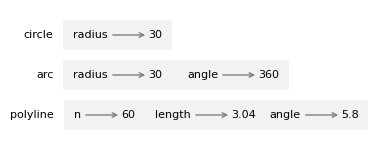

In [ ]:
from diagram import diagram, adjust

width, height, x, y = [3.58, 1.31, 0.98, 1.06]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
#adjust(x, y, bbox)

Observe que o valor de `angle` em `polyline` é diferente do valor de `angle` em `arc`.
Parâmetros são locais, o que significa que você pode usar o mesmo nome de parâmetro em funções diferentes; é uma variável diferente em cada função e pode se referir a um valor diferente.

## Um plano de desenvolvimento

Um **plano de desenvolvimento** é um processo para escrever programas.
O processo que usamos neste capítulo é "encapsulamento e generalização".
As etapas deste processo são:

1. Comece escrevendo um pequeno programa sem definições de função.

2. Depois que o programa estiver funcionando, identifique uma parte coerente dele, encapsule a parte em uma função e dê um nome a ela.

3. Generalize a função adicionando parâmetros apropriados.

4. Repita as etapas de 1 a 3 até ter um conjunto de funções funcionais.

5. Procure oportunidades para melhorar o programa por meio da refatoração. Por
exemplo, se você tiver um código semelhante em vários lugares, considere
fatorá-lo em uma função geral adequada.

Este processo tem algumas desvantagens -- veremos alternativas mais tarde -- mas pode ser útil se você não souber com antecedência como dividir o programa em funções.
Esta abordagem permite que você projete conforme avança.

O projeto de uma função tem duas partes:

* A **interface** é como a função é usada, incluindo seu nome, os parâmetros que ela recebe e o que a função deve fazer.

* A **implementação** é como a função faz o que deve fazer.

Por exemplo, aqui está a primeira versão de `circle` que escrevemos, que usa `polygon`:

In [ ]:
def circle(radius):
    circumference = 2 * math.pi * radius
    n = 30
    length = circumference / n
    polygon(n, length)

E aqui está a versão refatorada que usa `arc`:

In [ ]:
def circle(radius):
    arc(radius,  360)

Essas duas funções têm a mesma interface — elas usam os mesmos parâmetros e fazem a mesma coisa — mas têm implementações diferentes.

## Docstrings

Uma **docstring** é uma *string* no início de uma função que explica a interface ("doc" é a abreviação de "documentação").
Aqui está um exemplo:

In [ ]:
def polyline(n, length, angle):
    """Desenha segmentos de linha com o comprimento e ângulo entre eles
    fornecidos.

    n: número inteiro de segmentos de linha
    length: comprimento dos segmentos de linha
    angle: ângulo entre os segmentos (em graus)
    """
    for i in range(n):
        forward(length)
        left(angle)

Por convenção, docstrings são *strings* com aspas triplas, também conhecidas como ***strings* multilinhas** porque as aspas triplas permitem que a *string* ocupe mais de uma linha.

Uma docstring deve:

* Explicar concisamente o que a função faz, sem entrar em detalhes de como ela funciona,

* Explicar qual efeito cada parâmetro tem no comportamento da função e

* Indicar qual tipo cada parâmetro deve ser, se não for óbvio.

Escrever esse tipo de documentação é uma parte importante do projeto de interface.
Uma interface bem projetada deve ser simples de explicar; se você tiver dificuldade em explicar uma de suas funções, talvez a interface possa ser melhorada.

## Depuração

Uma interface é como um contrato entre uma função e um chamador. O
chamador concorda em fornecer certos argumentos e a função concorda em
fazer certo trabalho.

Por exemplo, `polyline` requer três argumentos: `n` tem que ser um inteiro; `length` deve ser um número positivo; e `angle` tem que ser um número, que é assume-se estar em graus.

Esses requisitos são chamados de **pré-condições** porque eles devem ser verdadeiros antes que a função comece a ser executada. Por outro lado, as condições ao final da função são **pós-condições**.
As pós-condições incluem o efeito pretendido da função (como desenhar segmentos de linha) e quaisquer efeitos colaterais (como mover a tartaruga ou fazer outras alterações).

As pré-condições são de responsabilidade do chamador. Se o chamador violar uma pré-condição e a função não funcionar corretamente, o bug está no chamador, não na função.

Se as pré-condições forem satisfeitas e as pós-condições não, o bug está na função. Se suas pré e pós-condições forem claras, elas podem ajudar na depuração.

## Glossário

**projeto de interface** (*interface design*)**:**
Um processo para projetar a interface de uma função, que inclui os parâmetros que ela deve ter.

**tela** (*canvas*)**:**
Uma janela usada para exibir elementos gráficos, incluindo linhas, círculos, retângulos e outras formas.

**encapsulamento** (*encapsulation*)**:**
O processo de transformar uma sequência de instruções em uma definição de função.

**generalização** (*generalization*)**:**
O processo de substituir algo desnecessariamente específico (como um número) por algo apropriadamente geral (como uma variável ou parâmetro).

**argumento de palavra-chave** (*keyword argument*)**:**
Um argumento que inclui o nome do parâmetro.

**refatoração** (*refactoring*)**:**
O processo de modificar um programa funcional para melhorar as interfaces das funçções e outras qualidades do código.

**plano de desenvolvimento** (*development plan*)**:**
Um processo para escrever programas.

**docstring:**
Uma *string* que aparece no topo de uma definição de função para documentar a interface da função.

***string* multilinha** (*multiline string*)**:**
Uma *string* entre aspas triplas que pode abranger mais de uma linha de um programa.

**pré-condição** (*precondition*)**:**
Um requisito que deve ser satisfeito pelo chamador antes que uma função comece.

**pós-condição** (*postcondition*)**:**
Um requisito que deve ser satisfeito pela função antes que ela termine.

## Exercícios

In [ ]:
# Esta célula diz ao Jupyter para fornecer informações detalhadas de depuração
# quando ocorre um erro de tempo de execução. Execute-a antes de trabalhar nos
# exercícios.

%xmode Verbose

Exception reporting mode: Verbose


Para os exercícios abaixo, há mais algumas funções turtle que você pode querer usar.

* `penup` levanta a caneta imaginária da tartaruga para que ela não deixe rastro quando se move.

* `pendown` coloca a caneta de volta para baixo.

A função a seguir usa `penup` e `pendown` para mover a tartaruga sem deixar rastro:

In [ ]:
from jupyturtle import penup, pendown

def jump(length):
    """Anda para frente unidades de comprimento sem deixar rastro.

    Pós-condição: Deixa caneta para baixo
    """
    penup()
    forward(length)
    pendown()

### Exercícios

Escreva uma função chamada `rectangle` que desenhe um retângulo com comprimentos laterais dados.
Por exemplo, aqui está um retângulo que tem `80` unidades de largura e `40` unidades de altura.

In [ ]:
# Solução

def rectangle(length1, length2):
    """Desenha um retâgulo com os comprimentos dados.

    length1: comprimento do primeiro lado
    length2: comprimento do segundo lado
    """
    for i in range(2):
        forward(length1)
        left(90)
        forward(length2)
        left(90)

Você pode usar o código a seguir para testar sua função:

In [ ]:
make_turtle()
rectangle(80, 40)

### Exercício

Escreva uma função chamada `rhombus` que desenhe um losango com um determinado comprimento lateral e um determinado ângulo interno. Por exemplo, aqui está um losango com comprimento lateral `50` e um ângulo interno de `60` graus.

In [ ]:
# Solução

def rhombus(length, angle):
    for i in range(2):
        forward(length)
        left(angle)
        forward(length)
        left(180-angle)

Você pode usar o código a seguir para testar sua função:

In [ ]:
make_turtle()
rhombus(50, 60)

### Exercício

Agora escreva uma função mais geral chamada `parallelogram` que desenha um quadrilátero com lados paralelos. Então reescreva `rectangle` e `rhombus` para usar `parallelogram`.

In [ ]:
# Solução

def parallelogram(length1, length2, angle):
    for i in range(2):
        forward(length1)
        left(angle)
        forward(length2)
        left(180-angle)

In [ ]:
# Solução

def rectangle(length1, length2):
    """Desenha um retângulo com os comprimentos dados.

    comprimento1: comprimento do primeiro lado
    comprimento2: comprimento do segundo lado
    """
    parallelogram(length1, length2, 90)

In [ ]:
# Solução

def rhombus(length, angle):
    parallelogram(length, length, angle)

Você pode usar o código a seguir para testar suas funções:

In [ ]:
make_turtle(width=400)
jump(-120)

rectangle(80, 40)
jump(100)
rhombus(50, 60)
jump(80)
parallelogram(80, 50, 60)

### Exercício

Escreva um conjunto apropriadamente geral de funções que podem desenhar formas como esta.

![](https://github.com/AllenDowney/ThinkPython/raw/v3/jupyturtle_pie.png)

Dica: Escreva uma função chamada `triangle` que desenha um segmento triangular e, em seguida, uma função chamada `draw_pie` que usa `triangle`.

In [ ]:
# Solução

def triangle(radius,  angle):
    """Desenha in triângulo isósceles.

    A tartaruga começa e termina no pico, voltada para o meio da base.

    radius: comprimento das pernas iguais
    angle: ângulo de meio pico em graus
    """
    y = radius * math.sin(angle * math.pi / 180)

    right(angle)
    forward(radius)
    left(90+angle)
    forward(2*y)
    left(90+angle)
    forward(radius)
    left(180-angle)

In [ ]:
# Solução

def draw_pie(n, radius):
    """Desenha uma torta dividida em segmentos radiais.

    n: número de segmentos
    radius: comprimento dos raios
    """
    angle = 360.0 / n
    for i in range(n):
        triangle(radius,  angle/2)
        left(angle)

Você pode usar o código a seguir para testar suas funções:

In [ ]:
turtle = make_turtle(delay=0)
jump(-80)

size = 40
draw_pie(5, size)
jump(2*size)
draw_pie(6, size)
jump(2*size)
draw_pie(7, size)

In [ ]:
with open("jupyturtle_pie.svg", "w") as svg_file:
    svg_content = turtle.get_SVG()
    svg_file.write(svg_content)

### Exercício

Escreva um conjunto apropriadamente geral de funções que desenhem flores como esta:

![](https://github.com/AllenDowney/ThinkPython/raw/v3/jupyturtle_flower.png)

Dica: Use `arc` para escrever uma função chamada `petal` que desenha uma pétala de flor.

In [ ]:
# Solução

def petal(radius,  angle):
    """Desenha uma pétala usando dois arcos.

    radius: raio dos arcos
    angle: ângulo (graus) que os arcos descrevem
    """
    for i in range(2):
        arc(radius,  angle)
        left(180-angle)

In [ ]:
# Solution

def flower(n, radius, angle):
    """Desenha uma flor com n pétalas.

    n: número de pétalas
    radius: raio dos arcos
    angle: ângulo (graus) que os arcos descrevem
    """
    for i in range(n):
        petal(radius,  angle)
        left(360.0/n)

Você pode usar o código a seguir para testar suas funções.

Como a solução desenha muitos segmentos de linhas pequenas, ela tende a ficar mais lenta enquanto é executada.
Para evitar isso, você pode adicionar o argumento de palavra-chave `auto_render=False` para evitar desenhar após cada passo e, então, chamar a função `render` no final para mostrar o resultado.

Enquanto estiver depurando, você pode querer remover `auto_render=False`.

In [ ]:
from jupyturtle import render

turtle = make_turtle(auto_render=False)

jump(-60)
n = 7
radius = 60
angle = 60
flower(n, radius, angle)

jump(120)
n = 9
radius = 40
angle = 85
flower(n, radius, angle)

render()

In [ ]:
with open("jupyturtle_flower.svg", "w") as svg_file:
    svg_content = turtle.get_SVG()
    svg_file.write(svg_content)

### Pergunte a um assistente virtual

Existem vários módulos como `jupyturtle` em Python, e o que usamos neste capítulo foi personalizado para este livro.
Então, se você pedir ajuda a um assistente virtual, ele não saberá qual módulo usar.
Mas se você der a ele alguns exemplos para trabalhar, ele provavelmente conseguirá descobrir.
Por exemplo, tente este *prompt* e veja se ele consegue escrever uma função que desenhe uma espiral:

```
O programa a seguir usa um módulo gráfico turtle para desenhar um círculo:

from jupyturtle import make_turtle, forward, left
import math

def polygon(n, length):
    angle = 360 / n
    for i in range(n):
        forward(length)
        left(angle)
        
def circle(radius):
    circumference = 2 * math.pi * radius
    n = 30
    length = circumference / n
    polygon(n, length)
    
make_turtle(delay=0)
circle(30)

Escreva uma função que desenhe uma espiral.
```

Em inglês:
```
The following program uses a turtle graphics module to draw a circle:

from jupyturtle import make_turtle, forward, left
import math

def polygon(n, length):
    angle = 360 / n
    for i in range(n):
        forward(length)
        left(angle)
        
def circle(radius):
    circumference = 2 * math.pi * radius
    n = 30
    length = circumference / n
    polygon(n, length)
    
make_turtle(delay=0)
circle(30)

Write a function that draws a spiral.
```

Tenha em mente que o resultado pode usar recursos que ainda não vimos e pode ter erros.
Copie o código do assistente virtual e veja se consegue fazê-lo funcionar.
Se não obteve o que queria, tente modificar o *prompt*.

In [ ]:
# Solução

def spiral(length, angle):
    turtle = make_turtle(delay=0)
    for _ in range(100):
        forward(length)
        right(angle)
        length += 1  # Aumente o comprimento de cada segmento

spiral(5, 90)

In [1]:
# Solução

# Com o prompt adicional:
# faça uma espiral circular e não altere o nome do módulo
# (make that a circular spiral, and don't change the name of the module)

import math

def circular_spiral(radius, angle):
    turtle = make_turtle(delay=0, width=500, height=500)
    rotations = 5
    distance = 2 * math.pi * radius / 360  # Calcula a distância para cada grau de rotação
    for _ in range(rotations * 360):
        forward(distance)
        left(angle)
        radius += 0.1  # Aumenta o raio de cada segmento
        distance = 2 * math.pi * radius / 360  # Recalcula a distância para o raio atualizado

circular_spiral(50, 1)

NameError: name 'make_turtle' is not defined

[Pense Python: 3ª Edição](https://rodrigocarlson.github.io/PensePython3ed/)

Copyright 2024 [Allen B. Downey](https://allendowney.com/) (versão original)

Copyright 2025 [Rodrigo Castelan Carlson](https://rodrigocarlson.paginas.ufsc.br/) (desta versão)

Foram preservadas as mesmas licenças da versão original.

Licença dos códigos: [MIT License](https://mit-license.org/)

Licença dos textos: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)